# Лабораторная работа №5.2.2 - 5.2.3
# По теме: "Изучение атома водорода и молекулы йода"

### Выполнял: Дмитрий Дроздов Б01-908
---

***Цель работы:***
исследование спектральных закономерностей в оптическом спектре водорода. По
результатам измерений вычисляются постоянные Ридберга. Исследуется спектр поглощения паров йода в
видимой области; по результатам измерения вычисляется энергия колебательного кванта молекулы йода и
энергия ее диссоциации в основном и в возбужденном состояниях.

---

***Теоретическое введение:***

Длины волн спектральных линий водородоподобного атома описываются формулой

$$
\dfrac{1}{\lambda_{mn}} = RZ^2 \left( \dfrac{1}{n^2} - \dfrac{1}{m^2} \right)
$$

где $R = 109677.6~\text{см}^{-1}$ - константа, называемая постоянной Ридберга, а $m$ и $n$ -- целые числа. 

![1](https://drive.google.com/uc?export=view&id=17MpgNTnX4Pc6Qmt-FUfsnNGgfiU2NDvP)


Мы будем изучать серию Бальмера, линии которой лежат в видимой области. Для неё $n = 2$, а $m = 3,~4,~5,~6\dots$ Первые четыре линии обозначаются соответственно $H_\alpha$, $H_\beta$, $H_\gamma$, $H_\delta$.
Для молекулы йода мы рассматриваем только нулевую серию, энергетическое положение линий поглощения определяется выражением

$$
h\nu_{0, n_2} = (E_2 - E_1) + h\nu_2 \left( n_2 + \dfrac{1}{2} \right) - \dfrac{1}{2} h \nu_1
$$

***Оборудование:***

Схема установки:

![Рис.1.Схема установки](https://drive.google.com/uc?export=view&id=1GaXFbXbnjUKifx_xUlA0lWI8XCTOGWLk)

### Ход работы

1. градуировка

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p local_modules/
!cp -r /content/drive/MyDrive/PhysicLabs/dragonLib.py local_modules/

# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append('local_modules')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from typing import TypeVar
import dragonLib as dl
import pandas as pd
import numpy as np
import os
import scipy.constants as spc
import matplotlib.pyplot as plt

l = [dl.SigmaDigit(1, 2), dl.SigmaDigit(2, 5)]
dl.to_valueList(l)

[1, 2]

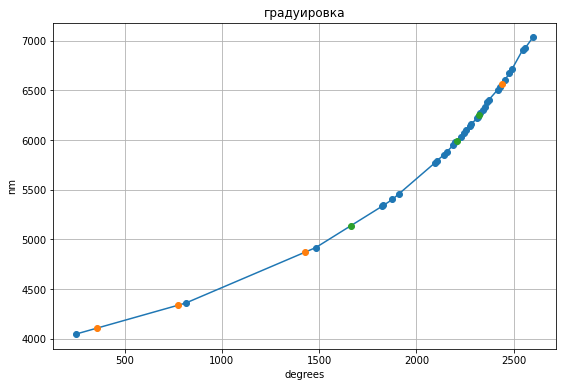

y =  1.33  * x +  3168.2


In [ ]:

lambdas =[7032, 6929, 6717, 6678, 6599, 6533, 6507, 6402, 6383, 6334, 6305, 6267, 6217, 6164, 6143, 6096, 6074, 6030, 5976, 5945, 5882, 5852, 5401, 5341, 5331, 6907, 6234, 5791, 5770, 5461, 4916, 4358, 4047]
degrees = [2598, 2560, 2492, 2478, 2454, 2430, 2418, 2371, 2360, 2353, 2344, 2326, 2314, 2282, 2276, 2254, 2244, 2231, 2200, 2188, 2156, 2142, 1876, 1830, 1822, 2546, 2312, 2105, 2095, 1912, 1482, 814, 252]
lambdas.sort()
degrees.sort()

H_degrees = [2440, 1427, 776, 358]
H_lambdas = [6560.5, 4870, 4337, 4105]
I_degrees = [2320, 2208, 1664]
I_lambdas = [6250, 5989.9, 5138.1]

plt.figure(figsize=[9, 6])
plt.grid()
plt.title("градуировка")
plt.ylabel("nm")
plt.xlabel("degrees")
plt.plot(degrees, lambdas, "-o")
plt.plot(H_degrees, H_lambdas, "o")
plt.plot(I_degrees, I_lambdas, "o")
plt.show()

coef = np.polyfit(degrees, lambdas, 1)
print("y = ", round(coef[0], 2), " * x + ", round(coef[1], 1))
lambd=lambda x: coef[0] * x + coef[1]

In [ ]:
print("Измеренные линии водорода:", H_lambdas)

Измеренные линии водорода: [6560.5, 4870, 4337, 4105]


$$
R = \frac{(mn)^2}{\lambda_{mn}\cdot{}Z^2(m^2 - n^2)}
$$

In [ ]:
R = lambda Z, n, m, lamb : ((m * n)**2) / (lamb * Z**2 * (m**2 - n**2)) * 10**7

R_exp = [round(R(1, 2, 3 + i, H_lambdas[i] / 10), 0) for i in range(len(H_lambdas))]

print("Average R =", sum(R_exp) / len(R_exp) )
print("Table R =", spc.Rydberg)

Average R = 109670.25
Table R = 10973731.56816


Запишем показания спектрометра для следующих переходов в молекуле йода: $\theta_{1,0}$ - переход из первого колебательного уровня основного состояния в нулевой колебательный уровень возбуждённого состояния,  $\theta_{1,5}$ - переход из первого колебательного уровня основного состояния в пятый колебательный уровень возбуждённого состояния, $\theta_{g}$ - переход из нулевого колебательного уровня основного состояния в область непрерывного спектра возбуждённого состояния. Получаем следующие данные:

\begin{equation*}
			\theta_{1,0}=2296 \pm 1, \ \theta_{1,5}=2190 \pm 1, \ \theta_g=1696 \pm 1,
		\end{equation*}
        
откуда находим соответствующие длины волн: 

\begin{equation*}
		 	\lambda_{1,0}=(612 \pm 2) \ \text{нм}, \ \lambda_{1,5}=(594 \pm 2) \ \text{нм}, \ \lambda_g=(514 \pm 2)\ \text{нм}.
		 \end{equation*}

Определим энергию колебательного кванта возбуждённого состояния молекулы по формуле: 
		\begin{equation*}
			h \nu_2=\dfrac{h\nu_{1,5}-h \nu_{1,0}}{5}=(0.0123\pm 0.002) \ \text{эВ}
		\end{equation*}
			
Вычислим энергию электронного перехода $\Delta E=E_2-E_1$, энергию диссоциации $D_1$ в основном состоянии и энергию диссоциации $D_2$ в возбуждённом состоянии, если известно, что энергия колебательного кванта основного состояния есть $h\nu_1=0,027$эВ

$$
\Delta{}E = h\nu_{(1,0)} - \dfrac{1}{2} h\nu_2 + \dfrac{3}{2} h\nu_1 = 2.06 \pm 0.07~\text{эВ}.
$$

Тогда энергии диссоциации частиц в основном и возбуждённом состоянии, с учётом того, что энергия возбуждения атома $E_A = 0.94~\text{эВ}$:

$$
D_1 = h\nu_{\text{гр}} - E_A = 1.46 \pm 0.04~\text{эВ},
$$
$$
D_2 = h\nu_{\text{гр}} - \Delta{}E = 0.35 \pm 0.09~\text{эВ}.
$$

### Вывод

В работе исследовались сериальные закономерности в оптическом спектре водорода и спектр поглощения паров йода в видимой области.
	
С помощью информации о спектральных линиях неона и ртути проградуирован спектрометр. Построен соответствующий график.
	
Получены длины волн линий $H_{\alpha}$, $H_{\beta}$ и $H_{\gamma}$ серии Бальмера, вычислена постоянная Ридберга. В рамках погрешности данные совпали с табличными.
	
Получены длины волн, соответствующие некоторым электронно-колебательным переходам из основного состояния в возбуждённое. Вычислены энергия колебательного кванта возбуждённого состояния молекулы, энергия электронного перехода, энергии диссоциации молекулы в основном и в возбуждённом состояниях.